In [ ]:
from google.colab import files


uploaded = files.upload()

Saving final dataset P53.csv to final dataset P53.csv


In [ ]:
import os
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
df = pd.read_csv('final dataset P53.csv')
print(df.shape)

(58195, 64)


In [ ]:
df.iloc[:,:4].values

array([[  74928, 7674181, 7674181,     782],
       [  49903, 7673803, 7673803,     817],
       [  46196, 7674191, 7674191,     772],
       ...,
       [   6585, 7674230, 7674230,     733],
       [  56444, 7675109, 7675109,     503],
       [   6586, 7675088, 7675088,     524]])

In [ ]:
df.iloc[:,-1].values

array(['VUS', 'Pathogenic', 'Pathogenic', ..., 'Pathogenic',
       'Likely Pathogenic', 'Pathogenic'], dtype=object)

In [ ]:
print(df)

       Database_ID  HG38_Start  HG38_End  Start_cDNA  End_cDNA  \
0            74928     7674181   7674181         782       782   
1            49903     7673803   7673803         817       817   
2            46196     7674191   7674191         772       772   
3            49448     7675082   7675081         530       531   
4            50890     7675088   7675088         524       524   
...            ...         ...       ...         ...       ...   
58190         6584     7675086   7675086         526       526   
58191        56443     7675125   7675125         487       487   
58192         6585     7674230   7674230         733       733   
58193        56444     7675109   7675109         503       503   
58194         6586     7675088   7675088         524       524   

       Exon_intron_start  Exon_intron_End Genome_base_coding  \
0                      7                7                  G   
1                      8                8                  C   
2              

In [ ]:
data = df.sample(frac=0.80, random_state=786)

In [ ]:
df

,Database_ID,HG38_Start,HG38_End,Start_cDNA,End_cDNA,Exon_intron_start,Exon_intron_End,Genome_base_coding,cDNA_variant,Codon,...,Transcript t8,WAF1_,MDM2_,BAX_,__14_3_3_s,AIP_,GADD45_,NOXA_,p53R2_,Pathogenicity
0,74928,7674181,7674181,782,782,7,7,G,c.782G>A,261,...,c.665G>A,62.006,99.45,210.105,169.468,113.605,80.125,139.634,73.604,VUS
1,49903,7673803,7673803,817,817,8,8,C,c.817C>T,273,...,c.700C>T,0.907,0,2.685,0.255,0,0.401,0,1.206,Pathogenic
2,46196,7674191,7674191,772,772,7,7,G,c.772G>A,258,...,c.655G>A,0.309,8.438,8.154,6.976,3.255,0.727,5.42,5.383,Pathogenic
3,49448,7675082,7675081,530,531,5,5,C,c.530_531delCCinsTT,177,...,c.413_414delCCinsTT,15.125,14.868,11.984,2.846,8.29,9.614,18.061,41.47,Likely Pathogenic
4,50890,7675088,7675088,524,524,5,5,G,c.524G>A,175,...,c.407G>A,12.414,17.56,10.52,10.518,2.629,4.08,7.293,7.825,Pathogenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58190,6584,7675086,7675086,526,526,5,5,T,c.526T>A,176,...,c.409T>A,13.273,18.534,11.714,6.344,0.117,2.905,5.451,7.022,Likely Pathogenic
58191,56443,7675125,7675125,487,487,5,5,T,c.487T>G,163,...,c.370T>G,11.937,16.789,12.229,5.136,4.487,2.574,7.536,6.475,Possibly pathogenic
58192,6585,7674230,7674230,733,733,7,7,G,c.733G>T,245,...,c.616G>T,0,0.341,0,0,0,0,0,0,Pathogenic
58193,56444,7675109,7675109,503,503,5,5,A,c.503A>G,168,...,c.386A>G,16.409,17.737,13.622,15.327,16.21,13.016,22.818,17.943,Likely Pathogenic


In [ ]:
data_unseen = df.drop(data.index)

In [ ]:
data_unseen

,Database_ID,HG38_Start,HG38_End,Start_cDNA,End_cDNA,Exon_intron_start,Exon_intron_End,Genome_base_coding,cDNA_variant,Codon,...,Transcript t8,WAF1_,MDM2_,BAX_,__14_3_3_s,AIP_,GADD45_,NOXA_,p53R2_,Pathogenicity
5,17530,7673793,7673793,827,827,8,8,C,c.827C>A,276,...,c.710C>A,0.415,0,0,0,0,0,0,0.495,Possibly pathogenic
6,62542,7673764,7673764,856,856,8,8,G,c.856G>C,286,...,c.739G>C,1.191,2.811,14.132,14.612,9.218,15.029,16.999,13.271,Possibly pathogenic
12,46134,7673787,7673787,833,833,8,8,C,c.833C>T,278,...,c.716C>T,0.807,2.128,5.981,2.724,1.356,1.533,3.174,3.652,Pathogenic
14,56304,7675094,7675094,518,518,5,5,T,c.518T>C,173,...,c.401T>C,7.493,18.116,12.2,25.859,6.411,30.428,39.173,29.923,Likely Pathogenic
18,46128,7673779,7673779,841,841,8,8,G,c.841G>C,281,...,c.724G>C,0.657,0,0.975,0,0,0,0,0,Pathogenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58168,6571,7673764,7673764,856,856,8,8,G,c.856G>A,286,...,c.739G>A,11.07,25.896,23.522,11.999,13.308,6.033,11.713,21.776,Pathogenic
58178,6574,7674221,7674221,742,742,7,7,C,c.742C>T,248,...,c.625C>T,0,0,0.684,0,0,0,0,0,Pathogenic
58188,56440,7675139,7675139,473,473,5,5,G,c.473G>C,158,...,c.356G>C,10.169,17.19,15.157,4.205,7.195,1.638,7.167,6.38,Likely Pathogenic
58192,6585,7674230,7674230,733,733,7,7,G,c.733G>T,245,...,c.616G>T,0,0.341,0,0,0,0,0,0,Pathogenic


In [ ]:
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (46556, 64)
Unseen Data For Predictions: (11639, 64)


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 907.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [ ]:
from pycaret.utils import version
version()

'3.3.2'

In [ ]:
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
!pip install --upgrade scikit-learn

  Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 54.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.26.0 requires scikit-learn<1.5.0,>=0.24, but you have scikit-learn 1.5.1 which is incompatible.


In [ ]:
from sklearn.metrics._scorer import _SCORERS
from sklearn.metrics import __all__
from sklearn.metrics import get_scorer_names
all_scorers = get_scorer_names()
type(all_scorers)

list

In [ ]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 53.1 MB/s eta 0:00:00


In [ ]:
df.Pathogenicity.value_counts()

In [ ]:
df['Pathogenicity'] = df['Pathogenicity'].map({'Benign':0, 'VUS':1, 'Possibly pathogenic':2, 'Likely Pathogenic':3, 'Pathogenic':4})

In [ ]:
df.Pathogenicity.value_counts()

In [ ]:
df.dropna(axis = 'columns')

,Database_ID,HG38_Start,HG38_End,Start_cDNA,End_cDNA,Exon_intron_start,Exon_intron_End,Genome_base_coding,cDNA_variant,Codon,...,Transcript t8,WAF1_,MDM2_,BAX_,__14_3_3_s,AIP_,GADD45_,NOXA_,p53R2_,Pathogenicity
0,74928,7674181,7674181,782,782,7,7,G,c.782G>A,261,...,c.665G>A,62.006,99.45,210.105,169.468,113.605,80.125,139.634,73.604,1
1,49903,7673803,7673803,817,817,8,8,C,c.817C>T,273,...,c.700C>T,0.907,0,2.685,0.255,0,0.401,0,1.206,4
2,46196,7674191,7674191,772,772,7,7,G,c.772G>A,258,...,c.655G>A,0.309,8.438,8.154,6.976,3.255,0.727,5.42,5.383,4
3,49448,7675082,7675081,530,531,5,5,C,c.530_531delCCinsTT,177,...,c.413_414delCCinsTT,15.125,14.868,11.984,2.846,8.29,9.614,18.061,41.47,3
4,50890,7675088,7675088,524,524,5,5,G,c.524G>A,175,...,c.407G>A,12.414,17.56,10.52,10.518,2.629,4.08,7.293,7.825,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58190,6584,7675086,7675086,526,526,5,5,T,c.526T>A,176,...,c.409T>A,13.273,18.534,11.714,6.344,0.117,2.905,5.451,7.022,3
58191,56443,7675125,7675125,487,487,5,5,T,c.487T>G,163,...,c.370T>G,11.937,16.789,12.229,5.136,4.487,2.574,7.536,6.475,2
58192,6585,7674230,7674230,733,733,7,7,G,c.733G>T,245,...,c.616G>T,0,0.341,0,0,0,0,0,0,4
58193,56444,7675109,7675109,503,503,5,5,A,c.503A>G,168,...,c.386A>G,16.409,17.737,13.622,15.327,16.21,13.016,22.818,17.943,3


In [ ]:
print(df.isnull().sum())

Database_ID      0
HG38_Start       0
HG38_End         0
Start_cDNA       0
End_cDNA         0
                ..
AIP_             0
GADD45_          0
NOXA_            0
p53R2_           0
Pathogenicity    0
Length: 64, dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.mean(axis = 0)

Database_ID          3.946651e+04
HG38_Start           7.674467e+06
HG38_End             7.674467e+06
Start_cDNA           6.616990e+02
End_cDNA             6.617098e+02
Exon_intron_start    6.508085e+00
Exon_intron_End      6.508085e+00
Codon                2.210081e+02
Base_Change_Size     9.890197e-01
Ins_Size             2.196065e-02
Del_Size             2.196065e-02
Leukemia_Stat        9.208150e-01
Solid_Stat           9.846854e-01
Tumor_Stat           9.820128e-01
Cell_line_Stat       1.054164e+00
Somatic_Stat         9.767937e-01
Germline_Stat        1.021545e+00
Pathogenicity        3.359086e+00
dtype: float64

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df.dropna()

,Database_ID,HG38_Start,HG38_End,Start_cDNA,End_cDNA,Exon_intron_start,Exon_intron_End,Genome_base_coding,cDNA_variant,Codon,...,Transcript t8,WAF1_,MDM2_,BAX_,__14_3_3_s,AIP_,GADD45_,NOXA_,p53R2_,Pathogenicity
0,74928,7674181,7674181,782,782,7,7,G,c.782G>A,261,...,c.665G>A,62.006,99.45,210.105,169.468,113.605,80.125,139.634,73.604,1
1,49903,7673803,7673803,817,817,8,8,C,c.817C>T,273,...,c.700C>T,0.907,0,2.685,0.255,0,0.401,0,1.206,4
2,46196,7674191,7674191,772,772,7,7,G,c.772G>A,258,...,c.655G>A,0.309,8.438,8.154,6.976,3.255,0.727,5.42,5.383,4
3,49448,7675082,7675081,530,531,5,5,C,c.530_531delCCinsTT,177,...,c.413_414delCCinsTT,15.125,14.868,11.984,2.846,8.29,9.614,18.061,41.47,3
4,50890,7675088,7675088,524,524,5,5,G,c.524G>A,175,...,c.407G>A,12.414,17.56,10.52,10.518,2.629,4.08,7.293,7.825,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58190,6584,7675086,7675086,526,526,5,5,T,c.526T>A,176,...,c.409T>A,13.273,18.534,11.714,6.344,0.117,2.905,5.451,7.022,3
58191,56443,7675125,7675125,487,487,5,5,T,c.487T>G,163,...,c.370T>G,11.937,16.789,12.229,5.136,4.487,2.574,7.536,6.475,2
58192,6585,7674230,7674230,733,733,7,7,G,c.733G>T,245,...,c.616G>T,0,0.341,0,0,0,0,0,0,4
58193,56444,7675109,7675109,503,503,5,5,A,c.503A>G,168,...,c.386A>G,16.409,17.737,13.622,15.327,16.21,13.016,22.818,17.943,3


In [ ]:
df.columns

Index(['Database_ID', 'HG38_Start', 'HG38_End', 'Start_cDNA', 'End_cDNA',
       'Exon_intron_start', 'Exon_intron_End', 'Genome_base_coding',
       'cDNA_variant', 'Codon', 'WT_AA_1', 'WT_AA_3', 'Mutant_AA_1',
       'Mutant_AA_3', 'Domain', 'Base_Change_Size', 'Ins_Size', 'Del_Size',
       'Wt_Codon', 'Mutant_Codon', 'Type', 'Mutation_Type', 'CpG',
       'Variant_Classification', 'Variant Comment', 'Variant_Type',
       'Mutation_origin', 'Disease', 'Sample_origin', 'Solid', 'Complexity',
       'Leukemia_Stat', 'Solid_Stat', 'Tumor_Stat', 'Cell_line_Stat',
       'Somatic_Stat', 'Germline_Stat', 'Sift Score', 'Sift Prediction',
       'Provean_Score', 'Provean_prediction', 'Mutassessor_score',
       'Mutassessor_prediction:', 'Polyphen', 'Condel',
       'MutPred_Splice_General_Score', 'Prediction_Label', 'Transcript t1',
       'Transcript t2', 'Transcript t3', 'Transcript t4', 'Transcript t5',
       'Transcript t6', 'Transcript t7', 'Transcript t8', 'WAF1_', 'MDM2_',
       

In [ ]:
exp.setup(data = df, target = 'Pathogenicity', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Pathogenicity
2,Target type,Multiclass
3,Original data shape,"(58195, 64)"
4,Transformed data shape,"(58195, 222)"
5,Transformed train set shape,"(40736, 222)"
6,Transformed test set shape,"(17459, 222)"
7,Ordinal features,5
8,Numeric features,17
9,Categorical features,46


In [ ]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [ ]:
exp.setup(data, target = 'Pathogenicity', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Pathogenicity
2,Target type,Multiclass
3,Target mapping,"Benign: 0, Likely Pathogenic: 1, Pathogenic: 2, Possibly pathogenic: 3, VUS: 4"
4,Original data shape,"(49466, 64)"
5,Transformed data shape,"(49466, 212)"
6,Transformed train set shape,"(34626, 212)"
7,Transformed test set shape,"(14840, 212)"
8,Ordinal features,5
9,Numeric features,17


In [ ]:
best = exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9983,1.0000,0.9983,0.9983,0.9983,0.9967,0.9967,8.7970
gbc,Gradient Boosting Classifier,0.9906,1.0000,0.9906,0.9907,0.9903,0.9819,0.9821,94.3220
et,Extra Trees Classifier,0.9894,1.0000,0.9894,0.9900,0.9890,0.9798,0.9800,6.0760
lightgbm,Light Gradient Boosting Machine,0.9894,1.0000,0.9894,0.9897,0.9890,0.9797,0.9799,14.5900
rf,Random Forest Classifier,0.9888,1.0000,0.9888,0.9895,0.9884,0.9787,0.9789,5.7380
dt,Decision Tree Classifier,0.9846,0.9907,0.9846,0.9859,0.9843,0.9706,0.9709,3.8510
lda,Linear Discriminant Analysis,0.9657,0.9977,0.9657,0.9650,0.9653,0.9346,0.9346,5.2350
qda,Quadratic Discriminant Analysis,0.9555,0.9955,0.9555,0.9631,0.9460,0.9145,0.9178,4.4290
ada,Ada Boost Classifier,0.9381,0.9874,0.9381,0.9276,0.9154,0.8809,0.8856,8.0990
ridge,Ridge Classifier,0.9282,0.0000,0.9282,0.9254,0.9257,0.8597,0.8607,3.6750


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
df.Disease.value_counts(normalize=True) * 100

NameError: name 'df' is not defined

In [ ]:
df.Codon.value_counts()

273    5259
248    5064
175    3700
245    2326
282    1871
       ... 
368       1
385       1
386       1
29        1
19        1
Name: Codon, Length: 361, dtype: int64

<Axes: ylabel='Codon'>

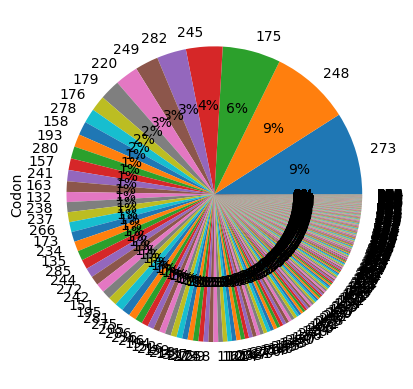

In [ ]:
df.Codon.value_counts().plot(kind='pie',autopct='%.f%%')

In [ ]:
xgboost = exp.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9980,1.0000,0.9980,0.9980,0.9980,0.9962,0.9962
1,0.9986,1.0000,0.9986,0.9986,0.9985,0.9973,0.9973
2,0.9980,1.0000,0.9980,0.9980,0.9980,0.9962,0.9962
3,0.9974,1.0000,0.9974,0.9974,0.9974,0.9951,0.9951
4,0.9986,1.0000,0.9986,0.9988,0.9986,0.9973,0.9973
5,0.9965,1.0000,0.9965,0.9969,0.9966,0.9934,0.9934
6,0.9983,1.0000,0.9983,0.9983,0.9983,0.9967,0.9967
7,0.9994,1.0000,0.9994,0.9994,0.9994,0.9989,0.9989
8,0.9991,1.0000,0.9991,0.9992,0.9992,0.9984,0.9984


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(xgboost)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [ ]:
gbc = exp.create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9913,1.0000,0.9913,0.9914,0.9911,0.9834,0.9835
1,0.9902,1.0000,0.9902,0.9903,0.9898,0.9811,0.9813
2,0.9902,1.0000,0.9902,0.9903,0.9898,0.9811,0.9813
3,0.9902,1.0000,0.9902,0.9903,0.9899,0.9811,0.9813
4,0.9919,1.0000,0.9919,0.9921,0.9917,0.9846,0.9847
5,0.9882,1.0000,0.9882,0.9884,0.9876,0.9772,0.9775
6,0.9890,1.0000,0.9890,0.9892,0.9886,0.9789,0.9791
7,0.9908,1.0000,0.9908,0.9909,0.9904,0.9822,0.9824
8,0.9928,1.0000,0.9928,0.9928,0.9926,0.9862,0.9863


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
et = exp.create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9876,0.9998,0.9876,0.9884,0.9871,0.9763,0.9766
1,0.9879,1.0000,0.9879,0.9886,0.9874,0.9769,0.9771
2,0.9908,1.0000,0.9908,0.9912,0.9905,0.9824,0.9825
3,0.9887,1.0000,0.9887,0.9894,0.9883,0.9785,0.9788
4,0.9879,1.0000,0.9879,0.9887,0.9874,0.9769,0.9771
5,0.9893,1.0000,0.9893,0.9899,0.9890,0.9796,0.9798
6,0.9887,1.0000,0.9887,0.9894,0.9883,0.9785,0.9787
7,0.9922,1.0000,0.9922,0.9925,0.9920,0.9851,0.9852
8,0.9910,1.0000,0.9910,0.9915,0.9908,0.9829,0.9831


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)


In [ ]:
lightgbm = exp.create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9870,1.0000,0.9870,0.9872,0.9864,0.9749,0.9753
1,0.9879,1.0000,0.9879,0.9881,0.9873,0.9766,0.9770
2,0.9908,1.0000,0.9908,0.9909,0.9905,0.9823,0.9824
3,0.9876,1.0000,0.9876,0.9878,0.9870,0.9761,0.9764
4,0.9899,1.0000,0.9899,0.9902,0.9895,0.9806,0.9808
5,0.9879,1.0000,0.9879,0.9881,0.9873,0.9767,0.9770
6,0.9884,1.0000,0.9884,0.9886,0.9879,0.9777,0.9780
7,0.9916,1.0000,0.9916,0.9919,0.9914,0.9839,0.9841
8,0.9910,1.0000,0.9910,0.9914,0.9908,0.9828,0.9830


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [ ]:
rf = exp.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9867,1.0000,0.9867,0.9876,0.9861,0.9747,0.9750
1,0.9879,1.0000,0.9879,0.9886,0.9874,0.9769,0.9771
2,0.9908,1.0000,0.9908,0.9912,0.9905,0.9824,0.9825
3,0.9884,0.9998,0.9884,0.9892,0.9880,0.9780,0.9782
4,0.9879,1.0000,0.9879,0.9887,0.9874,0.9769,0.9771
5,0.9876,0.9998,0.9876,0.9884,0.9871,0.9763,0.9766
6,0.9882,1.0000,0.9882,0.9889,0.9877,0.9774,0.9777
7,0.9902,1.0000,0.9902,0.9907,0.9899,0.9813,0.9815
8,0.9910,1.0000,0.9910,0.9915,0.9908,0.9829,0.9831


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


In [ ]:
dt = exp.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9830,0.9897,0.9830,0.9845,0.9825,0.9675,0.9679
1,0.9835,0.9901,0.9835,0.9850,0.9832,0.9686,0.9690
2,0.9853,0.9911,0.9853,0.9864,0.9851,0.9719,0.9722
3,0.9827,0.9896,0.9827,0.9843,0.9824,0.9669,0.9674
4,0.9847,0.9908,0.9847,0.9860,0.9843,0.9708,0.9712
5,0.9830,0.9897,0.9830,0.9845,0.9826,0.9675,0.9679
6,0.9824,0.9894,0.9824,0.9840,0.9821,0.9664,0.9668
7,0.9873,0.9923,0.9873,0.9882,0.9871,0.9758,0.9760
8,0.9887,0.9932,0.9887,0.9894,0.9885,0.9785,0.9787


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')


In [ ]:
exp.setup(data=df)
data.plot_model(xgboost, plot = 'auc')


,Description,Value
0,Session id,1839
1,Target,Pathogenicity
2,Target type,Multiclass
3,Original data shape,"(58195, 71)"
4,Transformed data shape,"(58195, 253)"
5,Transformed train set shape,"(40736, 253)"
6,Transformed test set shape,"(17459, 253)"
7,Ordinal features,5
8,Numeric features,19
9,Categorical features,51


AttributeError: 'DataFrame' object has no attribute 'plot_model'

In [ ]:
tuned_xgboost = exp.tune_model(xgboost)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:50:57
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9902,1.0000,0.9902,0.9907,0.9899,0.9813,0.9814
1,0.9904,1.0000,0.9904,0.9909,0.9902,0.9817,0.9819
2,0.9907,1.0000,0.9907,0.9911,0.9904,0.9822,0.9824
3,0.9917,1.0000,0.9917,0.9920,0.9914,0.9841,0.9842
4,0.9897,1.0000,0.9897,0.9903,0.9894,0.9803,0.9805
5,0.9887,0.9998,0.9887,0.9894,0.9883,0.9785,0.9787
6,0.9899,0.9999,0.9899,0.9905,0.9896,0.9808,0.9810
7,0.9892,0.9999,0.9892,0.9898,0.9888,0.9794,0.9796
8,0.9912,1.0000,0.9912,0.9916,0.9909,0.9831,0.9833


In [ ]:
print(tuned_xgboost)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1e-06, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=260, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [ ]:
tuned_gbc = exp.tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9890,0.9999,0.9890,0.9894,0.9885,0.9789,0.9791
1,0.9904,1.0000,0.9904,0.9909,0.9901,0.9817,0.9819
2,0.9899,0.9999,0.9899,0.9904,0.9897,0.9808,0.9810
3,0.9912,1.0000,0.9912,0.9914,0.9909,0.9832,0.9833
4,0.9909,1.0000,0.9909,0.9913,0.9907,0.9827,0.9828
5,0.9892,1.0000,0.9892,0.9898,0.9889,0.9794,0.9796
6,0.9912,1.0000,0.9912,0.9915,0.9909,0.9831,0.9833
7,0.9892,0.9999,0.9892,0.9898,0.9888,0.9794,0.9796
8,0.9926,1.0000,0.9926,0.9928,0.9924,0.9860,0.9860


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='log_loss', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_samples_leaf=1,
                           min_samples_split=9, min_weight_fraction_leaf=0.0,
                           n_estimators=190, n_iter_no_change=None,
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
tuned_et = exp.tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9890,0.9971,0.9890,0.9895,0.9886,0.9789,0.9791
1,0.9890,0.9957,0.9890,0.9894,0.9885,0.9789,0.9791
2,0.9902,0.9984,0.9902,0.9907,0.9899,0.9813,0.9814
3,0.9907,0.9976,0.9907,0.9912,0.9904,0.9822,0.9824
4,0.9892,0.9971,0.9892,0.9898,0.9888,0.9794,0.9796
5,0.9853,0.9955,0.9853,0.9866,0.9850,0.9719,0.9722
6,0.9894,0.9966,0.9894,0.9898,0.9891,0.9798,0.9800
7,0.9877,0.9962,0.9877,0.9886,0.9873,0.9766,0.9768
8,0.9897,0.9970,0.9897,0.9900,0.9893,0.9803,0.9804


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
print(tuned_et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)


In [ ]:
tuned_lightgbm = exp.tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9924,1.0000,0.9924,0.9927,0.9922,0.9855,0.9856
1,0.9899,1.0000,0.9899,0.9908,0.9897,0.9808,0.9810
2,0.9904,1.0000,0.9904,0.9908,0.9902,0.9817,0.9819
3,0.9929,1.0000,0.9929,0.9935,0.9929,0.9864,0.9865
4,0.9975,1.0000,0.9975,0.9975,0.9975,0.9953,0.9953
5,0.9897,1.0000,0.9897,0.9909,0.9896,0.9804,0.9805
6,0.9902,1.0000,0.9902,0.9911,0.9900,0.9813,0.9814
7,0.9897,1.0000,0.9897,0.9905,0.9895,0.9803,0.9805
8,0.9909,1.0000,0.9909,0.9913,0.9907,0.9827,0.9828


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
print(tuned_lightgbm)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=51, min_child_weight=0.001, min_split_gain=0.8,
               n_estimators=150, n_jobs=-1, num_leaves=8, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.7,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
tuned_rf = exp.tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9882,0.9939,0.9882,0.9887,0.9879,0.9775,0.9777
1,0.9877,0.9937,0.9877,0.9886,0.9873,0.9766,0.9769
2,0.9892,0.9944,0.9892,0.9898,0.9889,0.9794,0.9796
3,0.9892,0.9950,0.9892,0.9893,0.9890,0.9794,0.9795
4,0.9880,0.9943,0.9880,0.9888,0.9875,0.9771,0.9773
5,0.9865,0.9935,0.9865,0.9875,0.9861,0.9743,0.9745
6,0.9875,0.9945,0.9875,0.9867,0.9867,0.9761,0.9762
7,0.9867,0.9937,0.9867,0.9876,0.9862,0.9747,0.9750
8,0.9885,0.9943,0.9885,0.9892,0.9881,0.9780,0.9782


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


In [ ]:
tuned_dt = exp.tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9894,0.9936,0.9894,0.9901,0.9891,0.9799,0.9801
1,0.9892,0.9935,0.9892,0.9898,0.9888,0.9794,0.9796
2,0.9904,0.9942,0.9904,0.9909,0.9902,0.9817,0.9819
3,0.9914,0.9948,0.9914,0.9918,0.9912,0.9836,0.9838
4,0.9902,0.9941,0.9902,0.9907,0.9899,0.9813,0.9814
5,0.9880,0.9932,0.9880,0.9891,0.9877,0.9771,0.9773
6,0.9907,0.9944,0.9907,0.9912,0.9904,0.9822,0.9824
7,0.9892,0.9935,0.9892,0.9898,0.9888,0.9794,0.9796
8,0.9899,0.9943,0.9899,0.9908,0.9897,0.9808,0.9810


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')
